# Churn Modelling Prediction With ANN
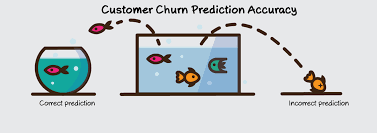

* Lot of work is done on Modelling using ANN with hyperparameter optimization.
* I have achieved accuracy of 86% using ANN.
* If you find my work interesting, do upvote it.

## Problem Statement

The dataset is the details of the customers in a company. The column are about it's estimated salary, age, sex, etc. Aiming to provide all details about an employee. We have to predict whether customer will exit the bank in future or not.

## Features

* CustomerId
* Surname
* CreditScore
* Geography(Country)
* Gender
* Age
* Tenure
* Balance
* NumOfProducts
* HasCrCard
* IsActiveMember
* EstimatedSalary
* Exited(Dependent Feature)

## Introduction

This notebook serves as tutorial for beginners to give them intuition about the practical implementation of artificial neural network. I have eplained about how to select best hyperparameters with the help of RandomizedSearchCV and KerasClassifier. I have also used D-Tale to perform EDA. I suggest you to use D-Tale only if you are familiar with basics about EDA.

**This is default first cell in any kaggle kernel. They import NumPy and Pandas libraries and it also lists the available Kernel files. NumPy is the fundamental package for scientific computing with Python. Pandas is the most popular python library that is used for data analysis.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Necessary Libraries

In [ ]:
# Plotting Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

# Metrics for Classification technique

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Scaler

from sklearn.preprocessing import RobustScaler, StandardScaler

# Cross Validation

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

# Keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LeakyReLU, PReLU, ELU
from keras.activations import relu, sigmoid
from keras.wrappers.scikit_learn import KerasClassifier

# others

!pip install -U dtale

## Data Loading

Our first step is to extract train and test data. We will be extracting data using pandas function read_csv. Specify the location to the dataset and import them.

In [ ]:
# Importing Data

df = pd.read_csv("../input/churn-modelling/Churn_Modelling.csv")
data = df.copy()
df.head(6) # Mention no of rows to be displayed from the top in the argument

# EDA

A brief work is done on EDA. Our main focus will be on implementation of ANN.

In [ ]:
df.info()

**Woah!! we need not to worry about missing values as there are no missing values.**

In [ ]:
df.describe().transpose()

**We will use D-Tale to perform EDA.**

In [ ]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_NGROK = True
d = dtale.show(df)
d.main_url()

**Click on the above link which opens another tab. Now you can analyze dataset without writing codes and you can also export code for the plots.**

In [ ]:
# Correlation between the features.

plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidth = 4,linecolor='black')
plt.tight_layout()

# Feature Engineering

In [ ]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

**Now we will use One-hot Encoding for categorical features.**

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [ ]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**There are two type of feature scaling - **

* Standarization - StandardScaler()
* Normalization - MinMaxScaler()

**We will use standarization for our case.**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling [ANN with Hyperparameter Optimization]

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the Dropout layer
classifier.add(Dropout(0.3))

* input_dim will be used only for first layer as it will take input 11 features of our dataset.
* No of layers =6
* Activation function = ReLu
* Whenever we use reLu as activation function, we use 'he_uniform' for our weight initialization technique.

## Dropout Layer

This layer is introduced to implement the concept of Inverted Dropout which is a regularization technique to prevent high variance. Accoding to the value of keep_prob(Research Paper Term) the layer randomly select neuron and deactivate them. While working for test set we multiply the weight with this keep_prob value. 
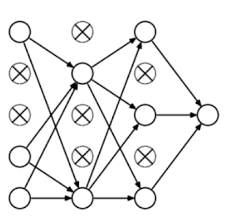

## Weight Initialization

* It is important to initialize wight correctly as it prevents exploding gradient problem.
* Do not initialize same value to each weight.
* There must be variance in weight initialization.
* In case of **ReLu** activation function, we prefer **he initialization** method.
* In case of **sigmoid** activation function, we prefer **glorot technique**.

### he_uniform

Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / fan_in) (fan_in is the number of input units in the weight tensor).

### he_normal

It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.

### glorot_uniform

Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / (fan_in+fan_out)) (fan_in is the number of input units in the weight tensor).

### glorot_normal

It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / (fan_in+fan_out)) where fan_in is the number of input units in the weight tensor.

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the Dropout layer
classifier.add(Dropout(0.2))

In [ ]:
# Adding the output layer

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

*  As we are having binary classification problem, we will be using sigmoid function as activation function in our last layer.
* Here we have glorot_uniform technique as weight initialization technique.

## Activation Function

### Sigmoid Function
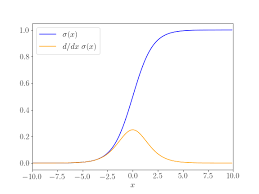

* The derivative of sigmoid function ranges from 0 to 0.25 which is root cause of vanishing gradient problem.
* Due to the above reason we prefer ReLu in hidden layers.



### ReLu Function
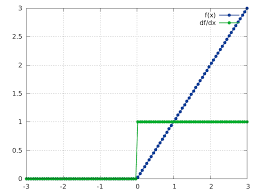

* While performing backpropagation, if derivative gets zero then old weight and new weight will be same.
* To overcome above problem we use Leaky ReLu activation function.

### Leaky ReLu Function
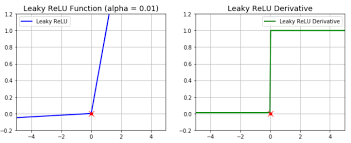

In [ ]:
# Compiling the ANN

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

* Adam optimizer is used to reduce the cost function to its lowest. It has advantages of both RMSProp and Adagrad optimizer method.
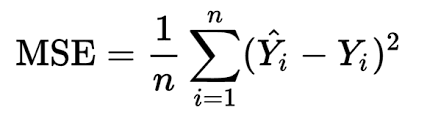

* 'binary_crossentropy' is used as loss as it is binary classification problem.

In [ ]:
# summary of model

classifier.summary()

In [ ]:
# Fitting the ANN to the Training set

classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

**We have achieved accuracy of 86.7% without Hyperparameter Optimization.**

### Hyperparameter Optimization

In [ ]:
# Function

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
layers = [(20,),(10,),(30,),(15,10),(30,15),(30,20),(25,10), (40, 20), (45, 30, 15),(50,20,10)]
activations = ['sigmoid', 'relu']
params = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[100])


In [ ]:
grid = RandomizedSearchCV(estimator=model, param_distributions =params,cv=5,n_iter=20,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

**After applying Hyperparameter optimization, the accuracy is somewhat same.**

# THANK YOU!!
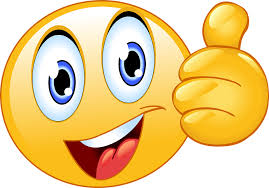